In [293]:
import requests
import random

from random import randint
from time import sleep

from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import math


import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# november 2020
from_date = '01-11-2020'
to_date = '30-11-2020'
# the setup with PHP filters
main_URL_2020 = 'https://www.tweedekamer.nl/kamerstukken/moties?clusterName=Tweedekamer.nl&fld_prl_kamerstuk=Moties&fld_tk_categorie=kamerstukken&qry=%2A&srt=date%3Adesc%3Adate&fromdate='+from_date+'&todate='+to_date+'&sta='
base_URL = 'https://www.tweedekamer.nl'
print(main_URL_2020+str(1))

https://www.tweedekamer.nl/kamerstukken/moties?clusterName=Tweedekamer.nl&fld_prl_kamerstuk=Moties&fld_tk_categorie=kamerstukken&qry=%2A&srt=date%3Adesc%3Adate&fromdate=01-11-2020&todate=30-11-2020&sta=1


In [106]:
# finding how many pages of motions exists within the filters
r = requests.get(main_URL_2020+str(1))
r.encoding = 'UTF-8'
soup = BeautifulSoup(r.text)
max_pages = int(soup.find('div',{'class':'max-pages'}).get_text().split()[-1])
print('max pages:',max_pages)

max pages: 53


In [222]:
# scrape all motion names and URLs from the soup of a page where they are listed
def get_motions(soup):
    h3_list = soup.find_all('h3')[1:]
    return np.array([[base_URL+h3.find('a')['href'],h3.find('a').get_text().split('over ')[-1]] for h3 in h3_list \
            if h3.find('a').get_text().split()[0] == 'Motie']).T

In [223]:
## put all the soups of the list pages in a list
## this code is a comment because it takes it time intensive and a csv file is already created
# items_per_page = 15
# list_pages = []
# for i in tqdm(range(max_pages)):
#     if i % 10 == 0:
#         sleep(10)
#     r = requests.get(main_URL_2020+str(items_per_page*i+1))
#     r.encoding = 'UTF-8'
#     list_pages.append(BeautifulSoup(r.text))

In [104]:
## create the dataframe with the URLs and names
## this code is a comment because it takes it time intensive and a csv file is already created
# motion_URLs = []
# motion_names = []
# for soup in tqdm(list_pages):
#     motions = get_motions(soup)
#     if motions.size > 0:
#         URL_extensions, names = motions
#         motion_URLs = motion_URLs + list(URL_extensions)
#         motion_names = motion_names + list(names)
# motion_df = pd.DataFrame({'URL':motion_URLs,'Name':motion_names})

In [103]:
## create a list with all the motion pages
## this code is a comment because it takes it time intensive and a csv file is already created
# motion_pages = []
# i = 0
# for URL in tqdm(list(motion_df.URL)):
#     i+=1
#     if i % 10 == 0:
#         sleep(5)
#     r = requests.get(URL)
#     r.encoding = 'UTF-8'
#     motion_pages.append(BeautifulSoup(r.text))

In [108]:
# strip the information from the motion soups
all_parties = ['VVD','PVV','CDA','D66','GroenLinks','SP','PvdA','ChristenUnie','PvdD','50PLUS','DENK', \
         'SGP','FvD','Krol','Van Kooten-Arissen']

def get_motion_info(soup,all_parties=all_parties):
    submitters = []
    parties = []
    party_votes = []
    if soup.find('div',{'class':'col-md-9'}):
        for row in soup.find('div',{'class':'col-md-9'}).find_all('div',{'class':'link-list__text'}):
            submitter, party = row.get_text().split('diener')[1].split(', ')
            submitters.append(submitter)
            parties.append(party.split('Kamerlid ')[1])
        if soup.find('table',{'class':'vote-result-table primary'}):
            yes_tds = soup.find('table',{'class':'vote-result-table primary'}).find_all('td')
            yes_parties = [yes_tds[i].get_text().replace('\n','') for i in range(len(yes_tds)) if i % 2 == 0]
            for party in all_parties:
                if party in yes_parties:
                    party_votes.append(1)
                else:
                    party_votes.append(0)
            return submitters,parties,party_votes
        return submitters,parties,[np.nan for x in range(len(all_parties))]
    # many errors can occur during webscraping
    return np.nan,np.nan,[np.nan for x in range(len(all_parties))]

In [111]:
## building a dataframe of all motions
## this code is a comment because it takes it continues on code that is now a comment

# submitters_list = []
# parties_list = []
# party_votes_list = []

# for soup in tqdm(motion_pages):
#     submitters,parties,party_votes = get_motion_info(soup)
#     submitters_list.append(submitters)
#     parties_list.append(parties)
#     party_votes_list.append(party_votes)
# motion_df['Submittor(s)'] = submitters_list
# motion_df['Submittor parties'] = parties_list
# for i in range(len(all_parties)):
#     motion_df[all_parties[i]] = np.array(party_votes_list).T[i]
# motion_df.to_csv('data/motions_november.csv',index=False)

In [221]:
motion_df = pd.read_csv('data/motions_december.csv',delimiter=',')
motion_df.head()

,URL,Name,Submittor(s),Submittor parties,VVD,PVV,CDA,D66,GroenLinks,SP,PvdA,ChristenUnie,PvdD,50PLUS,DENK,SGP,FvD,Krol,Van Kooten-Arissen
0,https://www.tweedekamer.nl/kamerstukken/moties...,de samenwerking in buitenlands beleid en veili...,"['Bram van Ojik', 'Lilianne Ploumen', 'Achraf ...","['GroenLinks', 'Partij van de Arbeid', 'Democr...",1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,https://www.tweedekamer.nl/kamerstukken/moties...,de inzet van de EU binnen de partnerschapsraad,"['Roelof Bisschop', 'Renske Leijten']","['Staatkundig Gereformeerde Partij', 'Socialis...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,https://www.tweedekamer.nl/kamerstukken/moties...,herstel van het democratisch deficit,"['Pieter Omtzigt', 'Stieneke van der Graaf']","['Christen-Democratisch Appèl', 'ChristenUnie']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,https://www.tweedekamer.nl/kamerstukken/moties...,een helpdesk voor uitleg van verdragsbepalingen,"['Pieter Omtzigt', 'Achraf Bouali', 'Stieneke ...","['Christen-Democratisch Appèl', 'Democraten 66...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,https://www.tweedekamer.nl/kamerstukken/moties...,een voorbehoud van voorlopige inwerkingtreding...,"['Roelof Bisschop', 'Renske Leijten']","['Staatkundig Gereformeerde Partij', 'Socialis...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [135]:
kmeans_df = motion_df.drop(['URL','Name','Submittor(s)',\
                    'Submittor parties'],axis=1).dropna().astype(int).T
kmeans_df

,0,1,2,3,4,5,6,7,8,9,...,500,503,504,505,506,507,508,509,510,511
VVD,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,1,0,0
PVV,0,1,1,1,1,1,1,0,1,0,...,1,0,1,0,1,0,0,1,1,1
CDA,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,1,0,0
D66,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GroenLinks,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PvdA,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ChristenUnie,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
PvdD,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
50PLUS,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


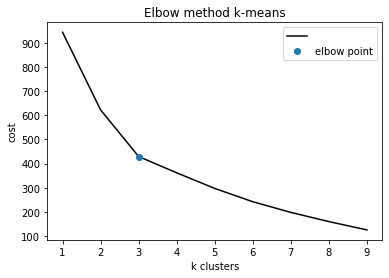

In [271]:
# elbow method
kmeans_cost = []
for k in range(1,10):
    kmeans_clusters = KMeans(n_clusters = k) 
    kmeans_clusters.fit(kmeans_df)
    kmeans_cost.append(kmeans_clusters.inertia_)
plt.title('Elbow method k-means')    
plt.xlabel('k clusters')
plt.ylabel('cost')
plt.plot(range(1,10),kmeans_cost,c='black')
# the elbow for the data in december 2020
plt.plot(3,kmeans_cost[2],'o')
plt.legend(['','elbow point'])
plt.show()

In [292]:
k = 3

kmeans_clusters = KMeans(n_clusters = k) 
kmeans_clusters.fit(kmeans_df)

clusters = kmeans_clusters.cluster_centers_

cluster_matrix = pd.DataFrame({'Party':list(kmeans_df.index),'Cluster':kmeans_clusters.labels_})

for i in range(k):
    print('\033[1mCluster '+str(i+1)+':\033[0m')
    print('Members:')
    print(list(cluster_matrix[cluster_matrix.Cluster == i]['Party']),'\n')
    # uncomment the code below to print the centers of the clusters
#     print('Cluster centers:')
#     print(clusters[i],'\n')

Cluster 1:
Members:
['PVV', 'SGP', 'FvD', 'Krol'] 

Cluster 2:
Members:
['GroenLinks', 'SP', 'PvdA', 'PvdD', '50PLUS', 'DENK', 'Van Kooten-Arissen'] 

Cluster 3:
Members:
['VVD', 'CDA', 'D66', 'ChristenUnie'] 



In [226]:
def euclidean_distance(p1,p2):
    return np.sqrt(np.sum((kmeans_df.loc[p1].to_numpy() - kmeans_df.loc[p2].to_numpy())**2))

In [228]:
distance_df = pd.DataFrame(index=kmeans_df.index)
for p1 in kmeans_df.index:
    column = []
    for p2 in kmeans_df.index:
        eucl = round(euclidean_distance(p1,p2),2)
        if eucl > 0:
            column.append(round(euclidean_distance(p1,p2),1))
        else:
            column.append('X')
    distance_df[p1] = column
distance_df

,VVD,PVV,CDA,D66,GroenLinks,SP,PvdA,ChristenUnie,PvdD,50PLUS,DENK,SGP,FvD,Krol,Van Kooten-Arissen
VVD,X,13.7,5.7,8.7,13.7,14.2,13.9,8.4,15.6,13.8,14,9.9,12.1,12.6,15.4
PVV,13.7,X,14.2,14.6,14,13.2,13.6,14.8,13.8,13.1,13,12.2,8.7,11.4,13.6
CDA,5.7,14.2,X,7.6,13,13.4,13.1,6.6,14.8,13.1,13.2,9.2,12.6,12.2,14.7
D66,8.7,14.6,7.6,X,11.1,12,11.7,6.2,13.3,11.8,12.2,11.2,13.8,12.6,13.2
GroenLinks,13.7,14,13,11.1,X,7.3,5.2,11.5,8.4,7.3,8.2,12.1,14.2,11.3,7.9
SP,14.2,13.2,13.4,12,7.3,X,7.1,12,7.1,7.7,7.9,12.1,13.6,10.8,7.5
PvdA,13.9,13.6,13.1,11.7,5.2,7.1,X,11.8,8.7,6.6,7.3,11.9,13.8,10.7,7.5
ChristenUnie,8.4,14.8,6.6,6.2,11.5,12,11.8,X,13.6,11.8,12.1,10.6,13.7,12.2,13.5
PvdD,15.6,13.8,14.8,13.3,8.4,7.1,8.7,13.6,X,9.5,9.6,13.6,14.8,12.4,6.5
50PLUS,13.8,13.1,13.1,11.8,7.3,7.7,6.6,11.8,9.5,X,7.3,11.8,13,9.6,7.8


In [229]:
def support(index,parties=kmeans_df.index):
    return np.mean([motion_df.loc[index,party] for party in parties])

def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p*math.log2(p)-(1-p)*math.log2(1-p)
    
print('Average divisiveness across parties:',round(np.mean([entropy(support(kmeans_df[col])) \
                                                            for col in kmeans_df.columns]),2))#

Average divisiveness across parties: 0.21


In [291]:
# what parties present the most motions together
submitters_list = [[sub_list[1:-1].split("'")[i] for i in range(len(sub_list[1:-1].split("'"))) if i % 2 == 1] \
                    for sub_list in motion_df['Submittor parties']]

submitter_parties = list(set([party for sublist in submitters_list for party in sublist]))


party_colab = {}
for party in submitter_parties:
    party_list = []
    for sub_list in submitters_list:
        if party in sub_list:
            party_list += list(set(sub_list))
    party_colab[party] = Counter(party_list)

short_dict = {'Volkspartij voor Vrijheid en Democratie':'VVD','Democraten 66':'D66','ChristenUnie':'ChristenUnie',\
           'Partij voor de Vrijheid':'PVV','Forum voor Democratie':'FvD','Socialistische Partij':'SP','Krol':'Krol',\
          'DENK':'DENK','Van Kooten-Arissen':'Van Kooten-Arissen','Christen-Democratisch Appèl':'CDA',\
          'Partij van de Arbeid':'PvdA','Partij voor de Dieren':'PvdD','Staatkundig Gereformeerde Partij':'SGP',\
          'GroenLinks':'GroenLinks','50PLUS':'50PLUS'}
    
colab_df = pd.DataFrame(index=[short_dict[party] for party in submitter_parties])
for p1 in submitter_parties:
    column = []
    for p2 in submitter_parties:
        if p1 != p2:
            column.append(round(party_colab[p1][p2]/party_colab[p1][p1],2))
        else:
            column.append('X')
    colab_df[short_dict[p1]] = column
# percentage of collab column with row    
colab_df.T

,VVD,D66,ChristenUnie,PVV,FvD,SP,Krol,DENK,Van Kooten-Arissen,CDA,PvdA,PvdD,SGP,GroenLinks,50PLUS
VVD,X,0.3,0.22,0.04,0,0.11,0,0.03,0,0.66,0.09,0.03,0.13,0.11,0.08
D66,0.29,X,0.29,0.03,0,0.1,0,0.03,0,0.43,0.19,0.06,0.09,0.23,0.09
ChristenUnie,0.35,0.47,X,0.04,0,0.12,0,0.04,0,0.67,0.12,0.06,0.18,0.08,0.1
PVV,0.04,0.02,0.02,X,0.06,0.05,0.04,0.02,0,0.04,0.08,0.02,0.05,0.05,0.04
FvD,0,0,0,0.36,X,0,0.21,0,0,0,0,0,0.14,0,0
SP,0.07,0.07,0.06,0.04,0,X,0.01,0.03,0.01,0.13,0.27,0.16,0.1,0.39,0.11
Krol,0,0,0,0.5,0.5,0.17,X,0,0,0,0.17,0,0.17,0.17,0.17
DENK,0.11,0.11,0.11,0.11,0,0.16,0,X,0,0.11,0.16,0.16,0.11,0.16,0.16
Van Kooten-Arissen,0,0,0,0,0,0.5,0,0,X,0,0.5,0,0,0.5,0
CDA,0.47,0.32,0.31,0.03,0,0.13,0,0.02,0,X,0.13,0.02,0.14,0.07,0.07
